In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv(r"C:\Users\User\OneDrive\Documents\4. Github Project & Dataset\python project\sorted_data.csv")
df.head()

loan_paid_back education_level  monthly_income employment_status  \
0               1        Master's         2020.02          Employed   
1               1      Bachelor's         1681.08          Employed   
2               1     High School         2181.82          Employed   
3               1     High School          989.49          Employed   
4               1           Other         2110.54          Employed   

   debt_to_income_ratio  credit_score  loan_amount  interest_rate  loan_term  \
0                  0.07           743     17173.72          13.39         36   
1                  0.22           531     22663.89          17.81         60   
2                  0.23           779      3631.36           9.53         60   
3                  0.26           809     14939.23           7.99         36   
4                  0.26           663     16551.71          15.20         60   

   installment  num_of_open_accounts  total_credit_limit  current_balance  \
0       581.88                     7            40833.47         24302.07   
1       573.17                     5            27968.01         10803.01   
2        76.32                     2            15502.25          4505.44   
3       468.07                     7            18157.79          5525.63   
4       395.50                     1            17467.56          3593.91   

   delinquency_history  public_records  num_of_delinquencies  
0                    1               0                     1  
1                    1               0                     3  
2                    0               0                     0  
3                    4               0                     5  
4                    2               0                     2

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_paid_back        20000 non-null  int64  
 1   education_level       20000 non-null  object 
 2   monthly_income        20000 non-null  float64
 3   employment_status     20000 non-null  object 
 4   debt_to_income_ratio  20000 non-null  float64
 5   credit_score          20000 non-null  int64  
 6   loan_amount           20000 non-null  float64
 7   interest_rate         20000 non-null  float64
 8   loan_term             20000 non-null  int64  
 9   installment           20000 non-null  float64
 10  num_of_open_accounts  20000 non-null  int64  
 11  total_credit_limit    20000 non-null  float64
 12  current_balance       20000 non-null  float64
 13  delinquency_history   20000 non-null  int64  
 14  public_records        20000 non-null  int64  
 15  num_of_delinquencie

In [4]:
df.value_counts("education_level") 

education_level
Bachelor's     8045
High School    5919
Master's       3724
Other          1508
PhD             804
Name: count, dtype: int64

In [5]:
df.value_counts("employment_status")

employment_status
Employed         13007
Self-employed     2923
Unemployed        2113
Retired           1176
Student            781
Name: count, dtype: int64

In [6]:
df.describe()


loan_paid_back  monthly_income  debt_to_income_ratio  credit_score  \
count    20000.000000    20000.000000          20000.000000   20000.00000   
mean         0.799900     3629.136466              0.177496     679.25695   
std          0.400085     2389.048326              0.105108      69.63858   
min          0.000000      500.000000              0.010000     373.00000   
25%          1.000000     2021.730000              0.100000     632.00000   
50%          1.000000     3048.770000              0.160000     680.00000   
75%          1.000000     4556.495000              0.240000     727.00000   
max          1.000000    33333.330000              0.670000     850.00000   

        loan_amount  interest_rate    loan_term   installment  \
count  20000.000000   20000.000000  20000.00000  20000.000000   
mean   15129.300909      12.400627     43.22280    455.625794   
std     8605.405513       2.442729     11.00838    274.622125   
min      500.000000       3.140000     36.00000      9.430000   
25%     8852.695000      10.740000     36.00000    253.910000   
50%    14946.170000      12.400000     36.00000    435.595000   
75%    20998.867500      14.002500     60.00000    633.595000   
max    49039.690000      22.510000     60.00000   1685.400000   

       num_of_open_accounts  total_credit_limit  current_balance  \
count          20000.000000        20000.000000     20000.000000   
mean               5.011800        48649.824769     24333.394631   
std                2.244529        32423.378128     22313.845395   
min                0.000000         6157.800000       496.350000   
25%                3.000000        27180.492500      9592.572500   
50%                5.000000        40241.615000     18334.555000   
75%                6.000000        60361.257500     31743.327500   
max               15.000000       454394.190000    352177.900000   

       delinquency_history  public_records  num_of_delinquencies  
count         20000.000000    20000.000000          20000.000000  
mean              1.990150        0.061800              2.489150  
std               1.474945        0.285105              1.631384  
min               0.000000        0.000000              0.000000  
25%               1.000000        0.000000              1.000000  
50%               2.000000        0.000000              2.000000  
75%               3.000000        0.000000              3.000000  
max              11.000000        2.000000             11.000000

In [7]:
print(f"Minimum loan Amount: {min(df["loan_amount"])}")

Minimum loan Amount: 500.0


In [8]:
print(f"Maximum loan Amount: {max(df["loan_amount"])}")

Maximum loan Amount: 49039.69


In [9]:
print(df.isna().sum())

loan_paid_back          0
education_level         0
monthly_income          0
employment_status       0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
loan_term               0
installment             0
num_of_open_accounts    0
total_credit_limit      0
current_balance         0
delinquency_history     0
public_records          0
num_of_delinquencies    0
dtype: int64


In [10]:
df.drop_duplicates()

loan_paid_back education_level  monthly_income employment_status  \
0                   1        Master's         2020.02          Employed   
1                   1      Bachelor's         1681.08          Employed   
2                   1     High School         2181.82          Employed   
3                   1     High School          989.49          Employed   
4                   1           Other         2110.54          Employed   
...               ...             ...             ...               ...   
19995               0      Bachelor's         3303.34          Employed   
19996               1      Bachelor's         2671.91          Employed   
19997               1        Master's         1553.50           Student   
19998               1        Master's         1848.45           Retired   
19999               0           Other         1978.14          Employed   

       debt_to_income_ratio  credit_score  loan_amount  interest_rate  \
0                      0.07           743     17173.72          13.39   
1                      0.22           531     22663.89          17.81   
2                      0.23           779      3631.36           9.53   
3                      0.26           809     14939.23           7.99   
4                      0.26           663     16551.71          15.20   
...                     ...           ...          ...            ...   
19995                  0.28           691     16322.23          15.05   
19996                  0.37           758     16697.34          11.89   
19997                  0.11           751     23924.78          10.06   
19998                  0.28           646     16920.13          16.06   
19999                  0.23           630     15769.75          13.07   

       loan_term  installment  num_of_open_accounts  total_credit_limit  \
0             36       581.88                     7            40833.47   
1             60       573.17                     5            27968.01   
2             60        76.32                     2            15502.25   
3             36       468.07                     7            18157.79   
4             60       395.50                     1            17467.56   
...          ...          ...                   ...                 ...   
19995         36       566.22                     2            23748.10   
19996         36       553.71                     8            49929.65   
19997         36       772.66                     3            13137.57   
19998         36       595.36                     5            19580.82   
19999         36       531.88                     8            43013.59   

       current_balance  delinquency_history  public_records  \
0             24302.07                    1               0   
1             10803.01                    1               0   
2              4505.44                    0               0   
3              5525.63                    4               0   
4              3593.91                    2               0   
...                ...                  ...             ...   
19995          5801.45                    1               0   
19996         40901.31                    3               0   
19997          5075.67                    1               0   
19998          3876.16                    4               0   
19999         12753.03                    2               0   

       num_of_delinquencies  
0                         1  
1                         3  
2                         0  
3                         5  
4                         2  
...                     ...  
19995                     4  
19996                     3  
19997                     2  
19998                     5  
19999                     2  

[20000 rows x 16 columns]

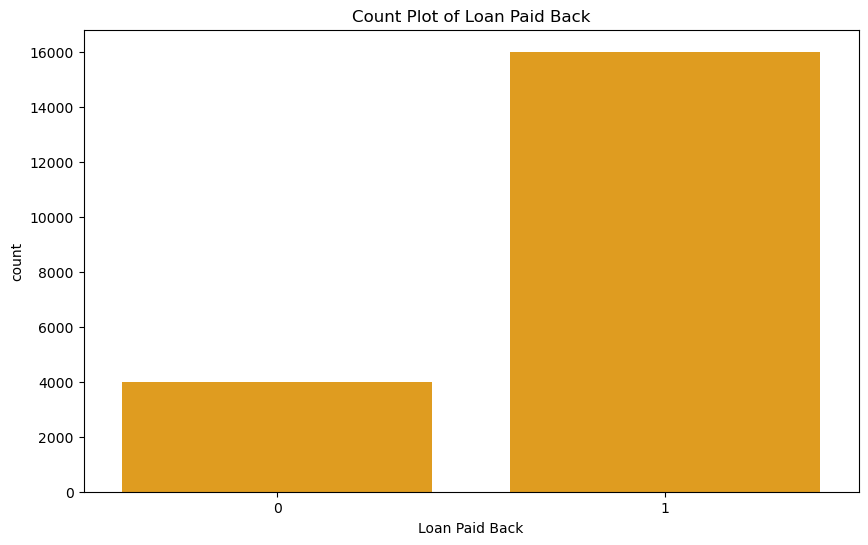

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(df, x="loan_paid_back",color = 'orange')
plt.title("Count Plot of Loan Paid Back")  
plt.xlabel("Loan Paid Back")
plt.show()

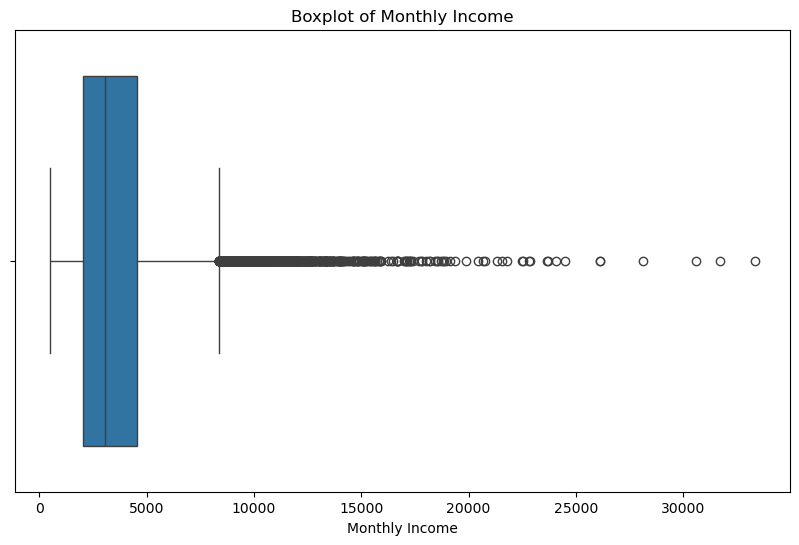

In [12]:

plt.figure(figsize=(10,6))
sns.boxplot(df, x="monthly_income")
plt.title("Boxplot of Monthly Income")  
plt.xlabel("Monthly Income")
plt.show()

In [13]:
seventyfive_percentile_mothlyincome=df["monthly_income"].quantile(0.75)

In [14]:
tewntyfive_percentile_mothlyincome=df["monthly_income"].quantile(0.25)

In [15]:
IQR=seventyfive_percentile_mothlyincome-tewntyfive_percentile_mothlyincome
print(IQR)

2534.765


In [16]:
upper_outlier = seventyfive_percentile_mothlyincome + (1.5*IQR)
lower_outlier = tewntyfive_percentile_mothlyincome - (1.5*IQR)
print(upper_outlier, lower_outlier)

8358.6425 -1780.4175


In [17]:
no_outliers= df[(df["monthly_income"]>=lower_outlier) & (df["monthly_income"]<=upper_outlier)].copy()
print(no_outliers)

       loan_paid_back education_level  monthly_income employment_status  \
0                   1        Master's         2020.02          Employed   
1                   1      Bachelor's         1681.08          Employed   
2                   1     High School         2181.82          Employed   
3                   1     High School          989.49          Employed   
4                   1           Other         2110.54          Employed   
...               ...             ...             ...               ...   
19995               0      Bachelor's         3303.34          Employed   
19996               1      Bachelor's         2671.91          Employed   
19997               1        Master's         1553.50           Student   
19998               1        Master's         1848.45           Retired   
19999               0           Other         1978.14          Employed   

       debt_to_income_ratio  credit_score  loan_amount  interest_rate  \
0                      0.0

In [18]:
print(no_outliers["monthly_income"].describe())

count    19076.000000
mean      3275.431041
std       1679.810750
min        500.000000
25%       1981.797500
50%       2940.785000
75%       4288.657500
max       8357.400000
Name: monthly_income, dtype: float64


Text(0, 0.5, 'Count')

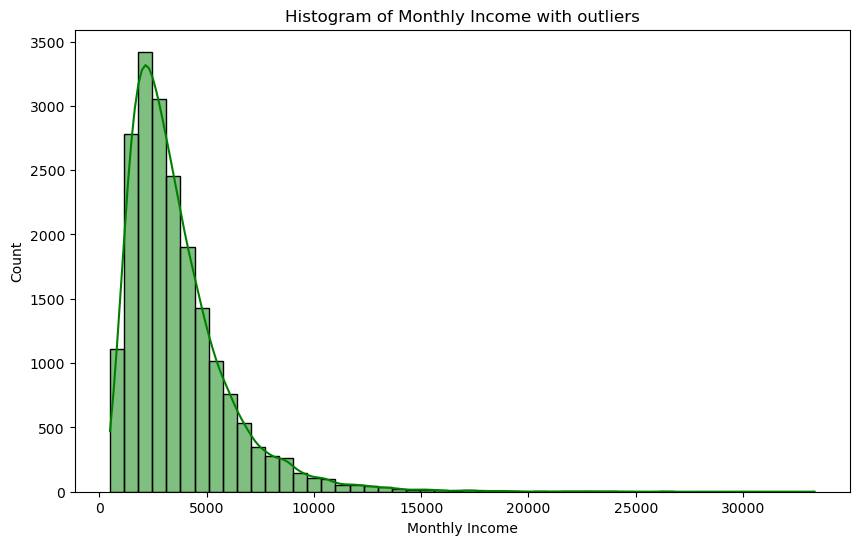

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df, x="monthly_income",bins=50 ,color = 'green', kde=True)
plt.title("Histogram of Monthly Income with outliers")
plt.xlabel("Monthly Income")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

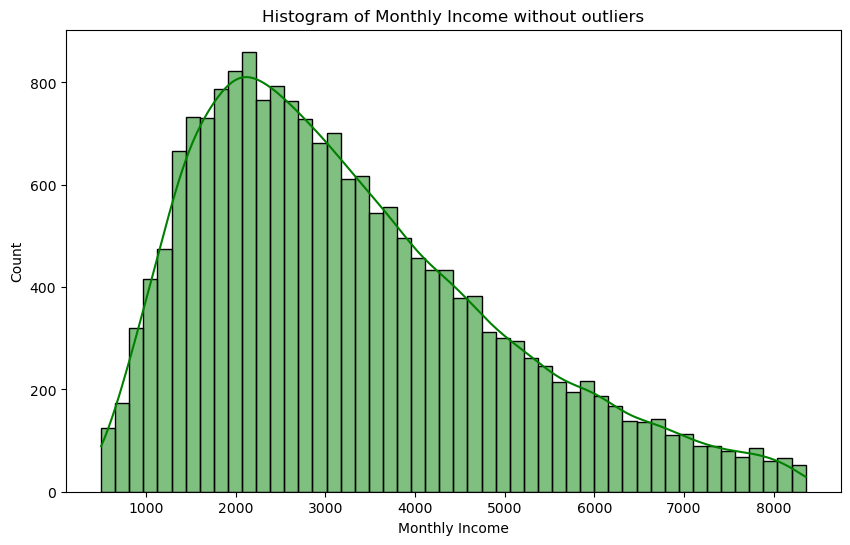

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(no_outliers, x="monthly_income",bins=50 ,color = 'green', kde=True)
plt.title("Histogram of Monthly Income without outliers")
plt.xlabel("Monthly Income")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

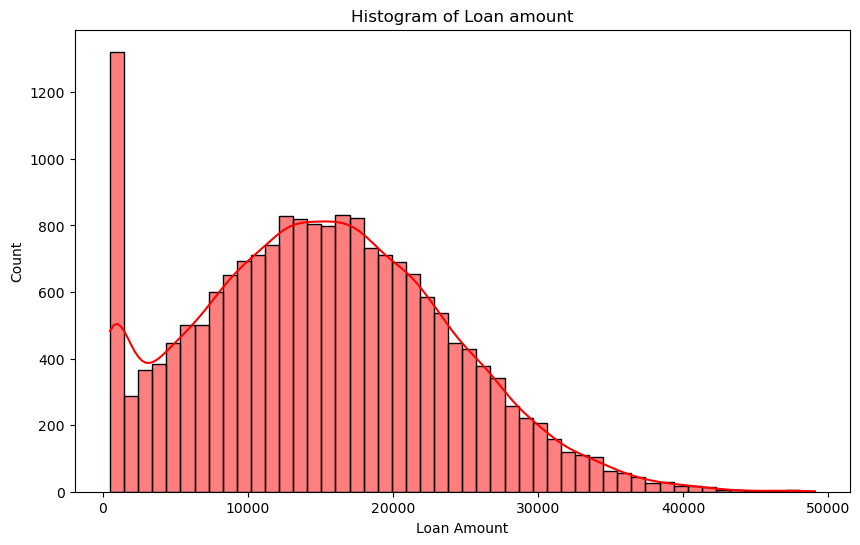

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(no_outliers, x="loan_amount",bins=50 ,color = 'red', kde=True)
plt.title("Histogram of Loan amount")
plt.xlabel("Loan Amount")
plt.ylabel("Count")

In [22]:
df["loan_amount"].describe()

count    20000.000000
mean     15129.300909
std       8605.405513
min        500.000000
25%       8852.695000
50%      14946.170000
75%      20998.867500
max      49039.690000
Name: loan_amount, dtype: float64

Text(0, 0.5, 'Density')

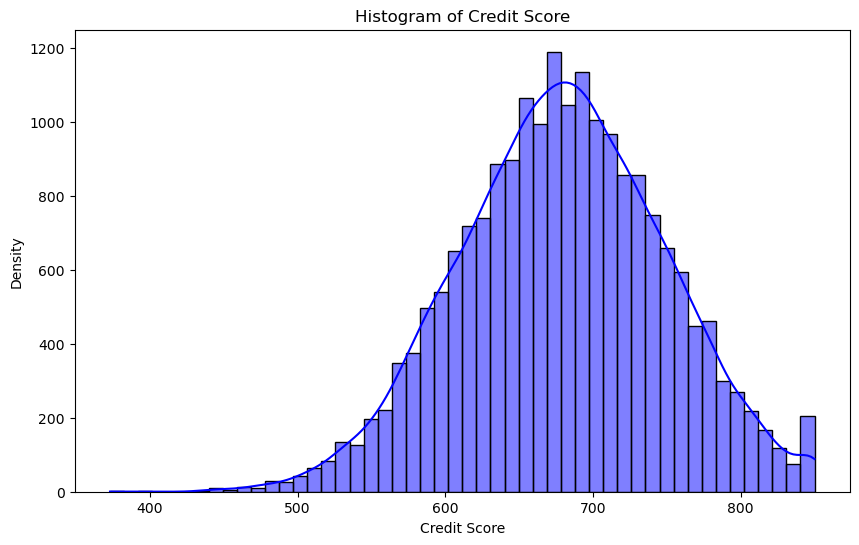

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df, x="credit_score",bins=50 ,color = 'blue', kde=True, line_kws={'color': 'black'})
plt.title("Histogram of Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Density")

In [24]:
skewness = no_outliers.skew(numeric_only=True)
print(skewness)

loan_paid_back         -1.503481
monthly_income          0.780185
debt_to_income_ratio    0.789635
credit_score           -0.073550
loan_amount             0.255350
interest_rate           0.026442
loan_term               0.872613
installment             0.469447
num_of_open_accounts    0.442304
total_credit_limit      1.163923
current_balance         1.569846
delinquency_history     0.824823
public_records          5.018849
num_of_delinquencies    0.720254
dtype: float64


In [25]:
no_outliers["income_to_loan_ratio"]=((no_outliers["monthly_income"]*12)/(no_outliers["loan_amount"]))

no_outliers["utilization_ratio"]=((no_outliers["current_balance"]*12)/(no_outliers["total_credit_limit"]))

In [26]:

no_outliers['education_encoded'] =  LabelEncoder().fit_transform(no_outliers['education_level'])

In [27]:
no_outliers['employment_encoded'] =  LabelEncoder().fit_transform(no_outliers['employment_status'])

In [28]:
no_outliers.head()

loan_paid_back education_level  monthly_income employment_status  \
0               1        Master's         2020.02          Employed   
1               1      Bachelor's         1681.08          Employed   
2               1     High School         2181.82          Employed   
3               1     High School          989.49          Employed   
4               1           Other         2110.54          Employed   

   debt_to_income_ratio  credit_score  loan_amount  interest_rate  loan_term  \
0                  0.07           743     17173.72          13.39         36   
1                  0.22           531     22663.89          17.81         60   
2                  0.23           779      3631.36           9.53         60   
3                  0.26           809     14939.23           7.99         36   
4                  0.26           663     16551.71          15.20         60   

   installment  num_of_open_accounts  total_credit_limit  current_balance  \
0       581.88                     7            40833.47         24302.07   
1       573.17                     5            27968.01         10803.01   
2        76.32                     2            15502.25          4505.44   
3       468.07                     7            18157.79          5525.63   
4       395.50                     1            17467.56          3593.91   

   delinquency_history  public_records  num_of_delinquencies  \
0                    1               0                     1   
1                    1               0                     3   
2                    0               0                     0   
3                    4               0                     5   
4                    2               0                     2   

   income_to_loan_ratio  utilization_ratio  education_encoded  \
0              1.411473           7.141809                  2   
1              0.890093           4.635157                  0   
2              7.209927           3.487576                  1   
3              0.794812           3.651742                  1   
4              1.530143           2.468972                  3   

   employment_encoded  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [85]:
no_outliers.to_csv("tranform_dataset.csv")

In [29]:
no_outliers.corr(numeric_only=True)

loan_paid_back  monthly_income  debt_to_income_ratio  \
loan_paid_back              1.000000        0.019801             -0.222571   
monthly_income              0.019801        1.000000             -0.006746   
debt_to_income_ratio       -0.222571       -0.006746              1.000000   
credit_score                0.202053        0.005617             -0.021741   
loan_amount                -0.003618       -0.003758             -0.004013   
interest_rate              -0.113965       -0.005073              0.014475   
loan_term                  -0.003623       -0.006311              0.005474   
installment                -0.010736       -0.003457             -0.002954   
num_of_open_accounts        0.003875        0.002780             -0.005415   
total_credit_limit          0.010068        0.842452             -0.001166   
current_balance             0.003278        0.570038             -0.001496   
delinquency_history        -0.083413        0.003121              0.227326   
public_records              0.005399       -0.001050             -0.001707   
num_of_delinquencies       -0.070747        0.001463              0.209722   
income_to_loan_ratio        0.005966        0.212248             -0.005432   
utilization_ratio          -0.005898        0.003826             -0.002116   
education_encoded           0.014446       -0.000182             -0.005339   
employment_encoded         -0.489946       -0.000054              0.011981   

                      credit_score  loan_amount  interest_rate  loan_term  \
loan_paid_back            0.202053    -0.003618      -0.113965  -0.003623   
monthly_income            0.005617    -0.003758      -0.005073  -0.006311   
debt_to_income_ratio     -0.021741    -0.004013       0.014475   0.005474   
credit_score              1.000000     0.007603      -0.569435   0.004303   
loan_amount               0.007603     1.000000      -0.006092   0.001611   
interest_rate            -0.569435    -0.006092       1.000000  -0.004115   
loan_term                 0.004303     0.001611      -0.004115   1.000000   
installment              -0.030968     0.945011       0.060932  -0.274990   
num_of_open_accounts     -0.003292    -0.005376       0.001876   0.015386   
total_credit_limit       -0.002704    -0.001485       0.000677  -0.002951   
current_balance          -0.008101    -0.008343       0.005138  -0.000285   
delinquency_history      -0.162587    -0.006647       0.091634  -0.002394   
public_records            0.003588     0.002117      -0.003741  -0.003170   
num_of_delinquencies     -0.142789    -0.008046       0.078712  -0.002597   
income_to_loan_ratio     -0.001167    -0.477663       0.010002  -0.002119   
utilization_ratio        -0.011766    -0.004393       0.009797   0.001168   
education_encoded        -0.001462    -0.003510       0.001437   0.008283   
employment_encoded        0.002165     0.010896       0.001008   0.002489   

                      installment  num_of_open_accounts  total_credit_limit  \
loan_paid_back          -0.010736              0.003875            0.010068   
monthly_income          -0.003457              0.002780            0.842452   
debt_to_income_ratio    -0.002954             -0.005415           -0.001166   
credit_score            -0.030968             -0.003292           -0.002704   
loan_amount              0.945011             -0.005376           -0.001485   
interest_rate            0.060932              0.001876            0.000677   
loan_term               -0.274990              0.015386           -0.002951   
installment              1.000000             -0.009226           -0.000905   
num_of_open_accounts    -0.009226              1.000000            0.102172   
total_credit_limit      -0.000905              0.102172            1.000000   
current_balance         -0.007391              0.066680            0.673074   
delinquency_history      0.001220             -0.000318            0.002854   
public_records           0.004729             -0

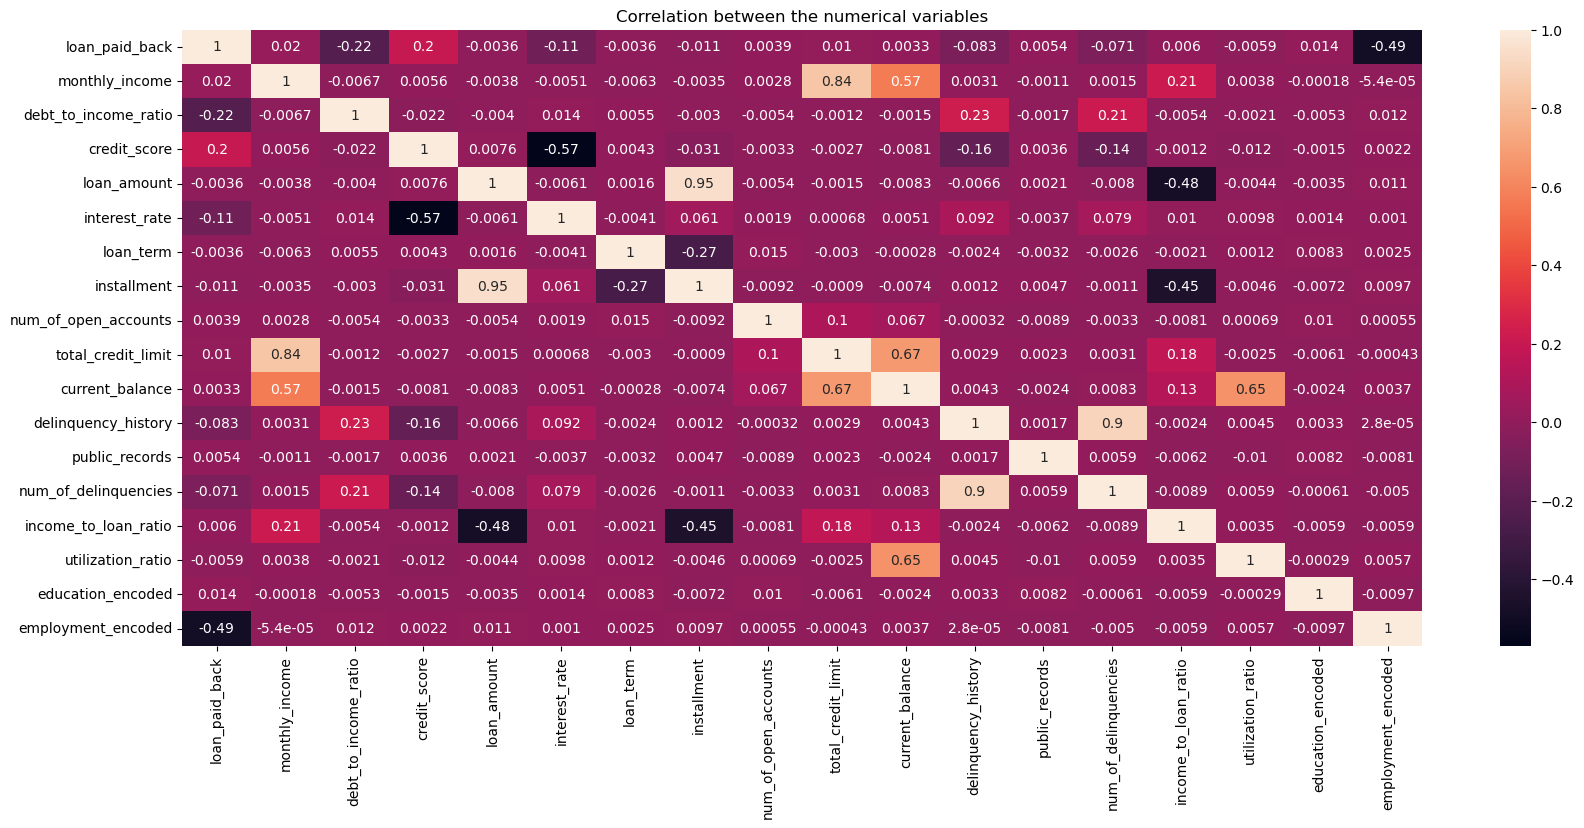

In [30]:
plt.figure(figsize=(20,8))
sns.heatmap(no_outliers.corr(numeric_only=True), annot=True)
plt.title("Correlation between the numerical variables")
plt.show()

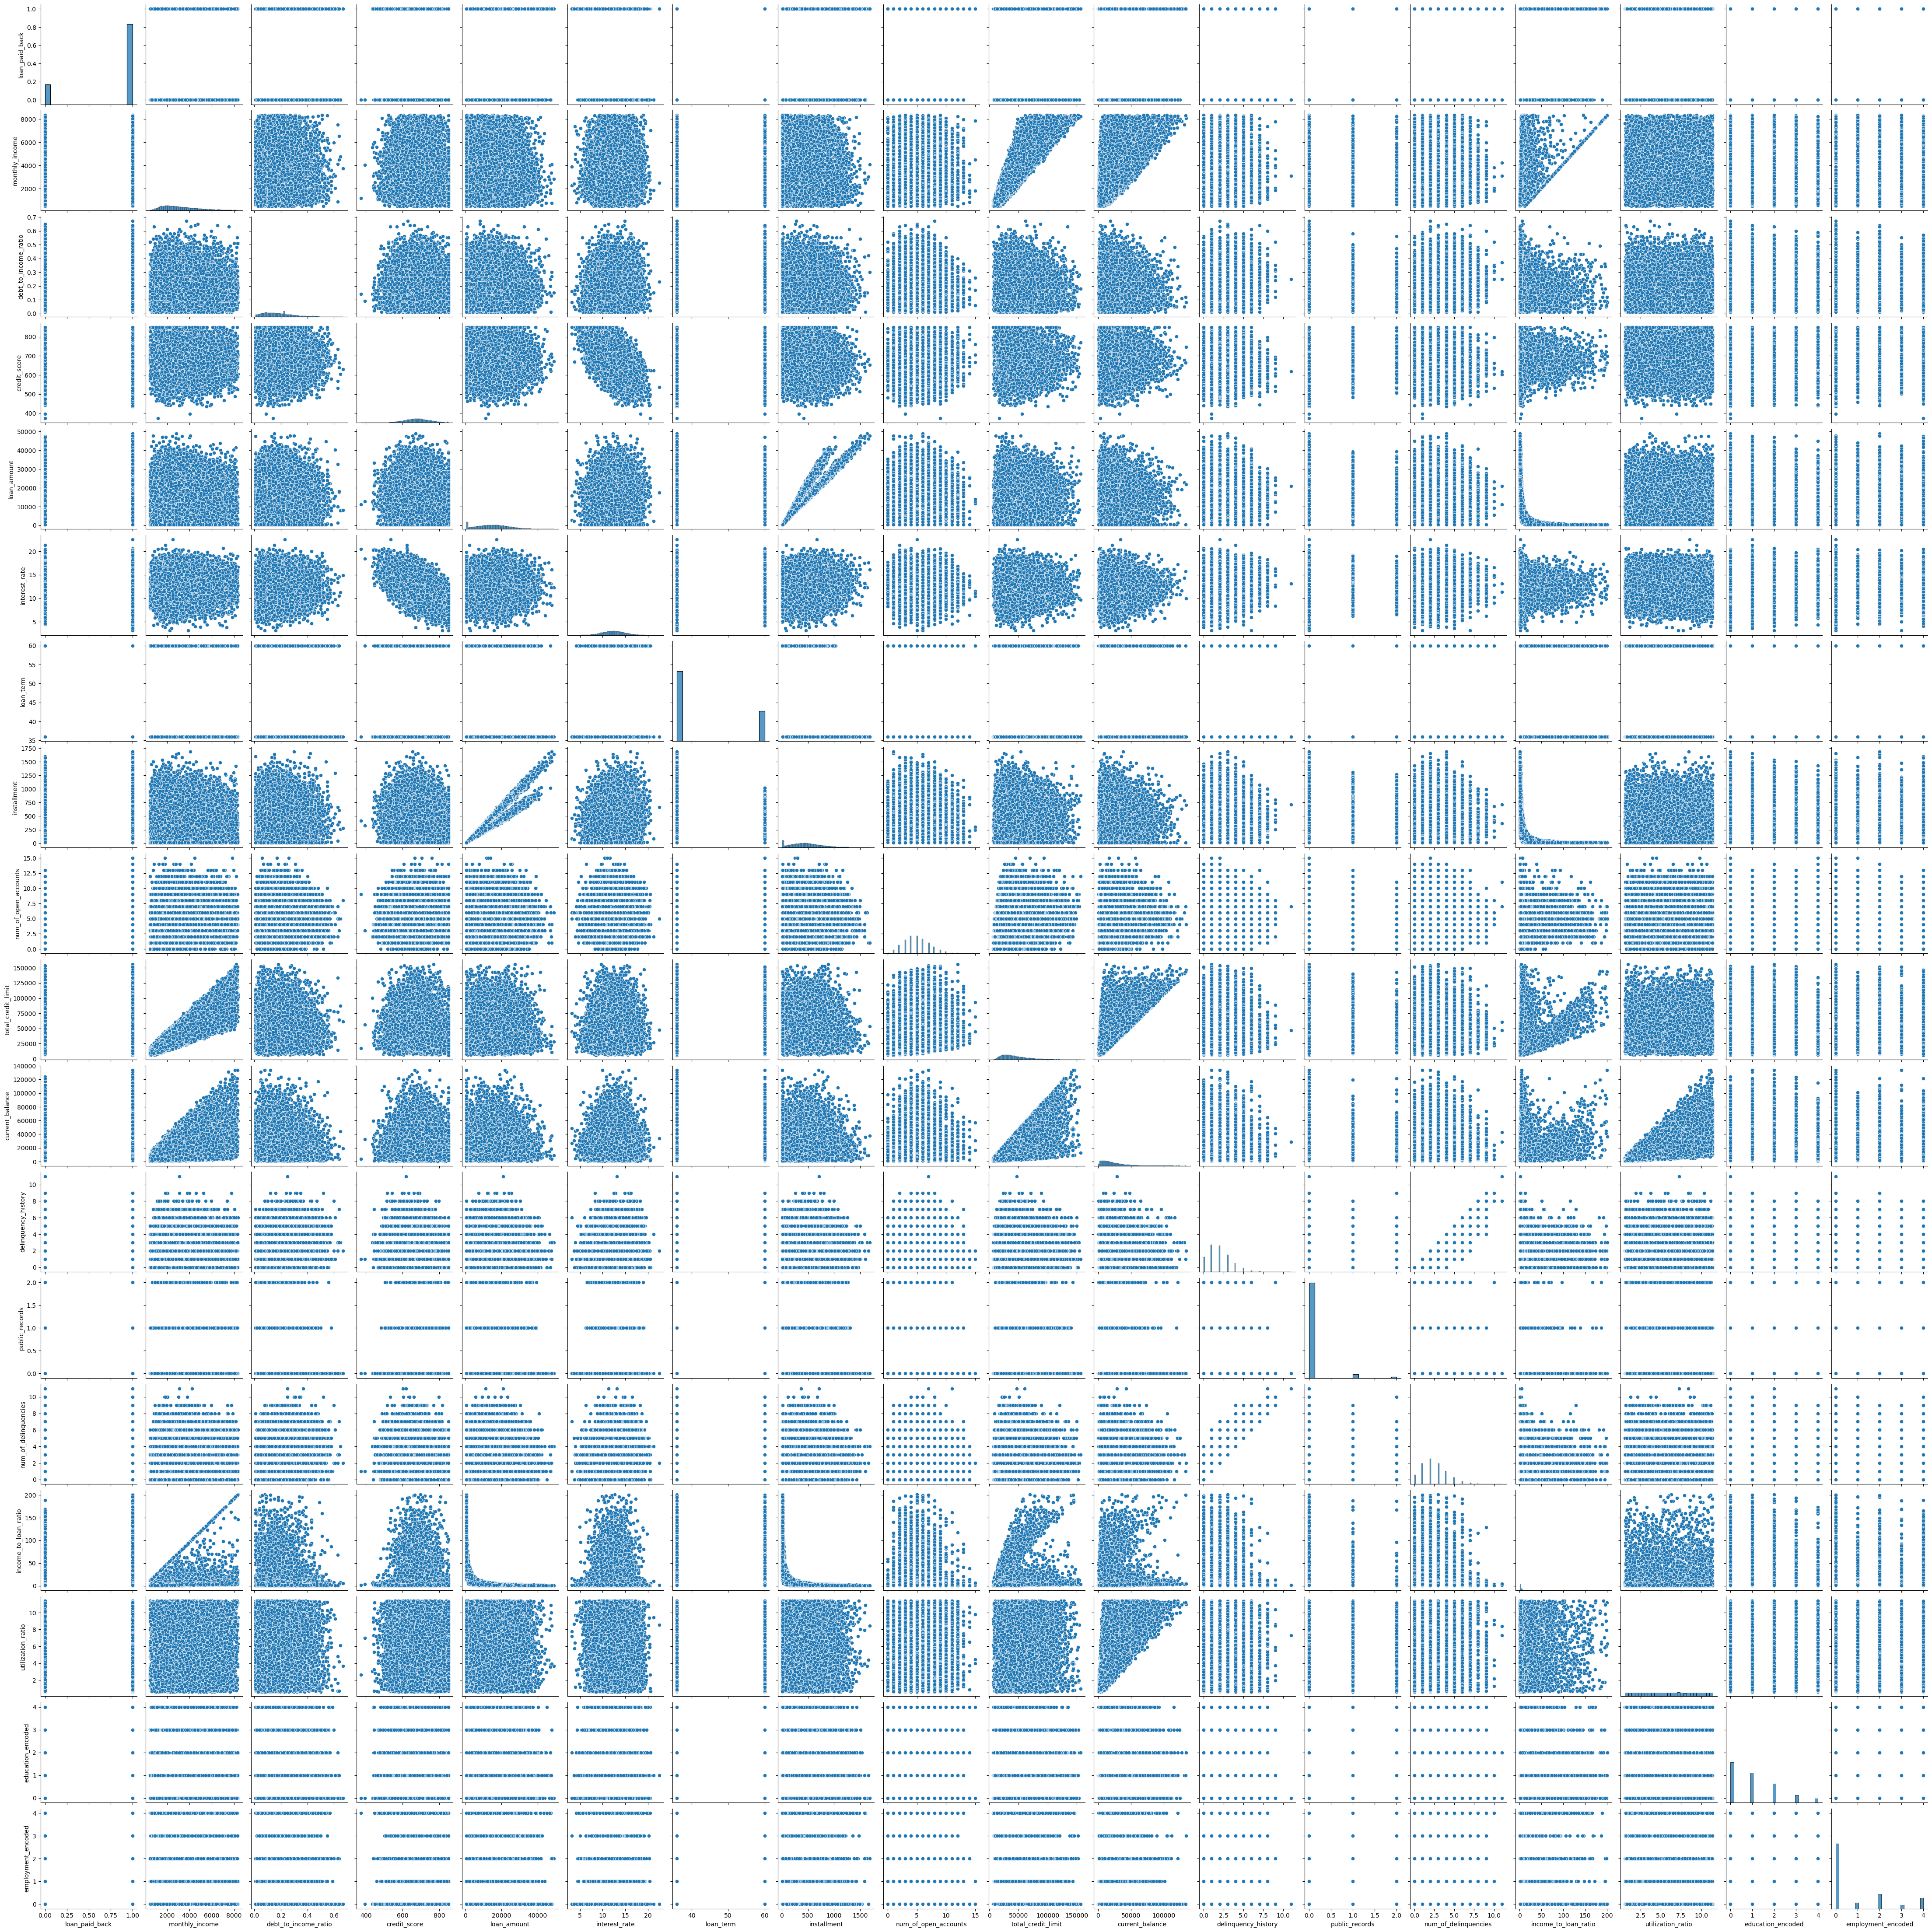

In [31]:
sns.pairplot(data=no_outliers)
plt.show()

In [32]:
X=no_outliers[["monthly_income", 
"debt_to_income_ratio",
"credit_score",
"loan_amount",
"interest_rate",
"loan_term",
"installment",
"num_of_open_accounts",
"total_credit_limit",
"current_balance",
"delinquency_history",
"public_records",
"num_of_delinquencies",
"income_to_loan_ratio",
"utilization_ratio",
"education_encoded",
"employment_encoded"]]

y=no_outliers["loan_paid_back"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=15
)

In [34]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]


In [81]:

X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.334290
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         loan_paid_back   No. Observations:                19076
Model:                          Logit   Df Residuals:                    19058
Method:                           MLE   Df Model:                           17
Date:                Tue, 13 Jan 2026   Pseudo R-squ.:                  0.3312
Time:                        21:53:51   Log-Likelihood:                -6376.9
converged:                       True   LL-Null:                       -9534.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.6606      0.417     -8.786      0.000      -4.477      -2.844

In [38]:


print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))



ROC-AUC Score:
0.8551456344480971
